In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Resume_Data.csv")
df['Cleaned_Resume'] = ''
df.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [ ]:
print ("Resume Categories")
print (df['Category'].value_counts())

Resume Categories
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


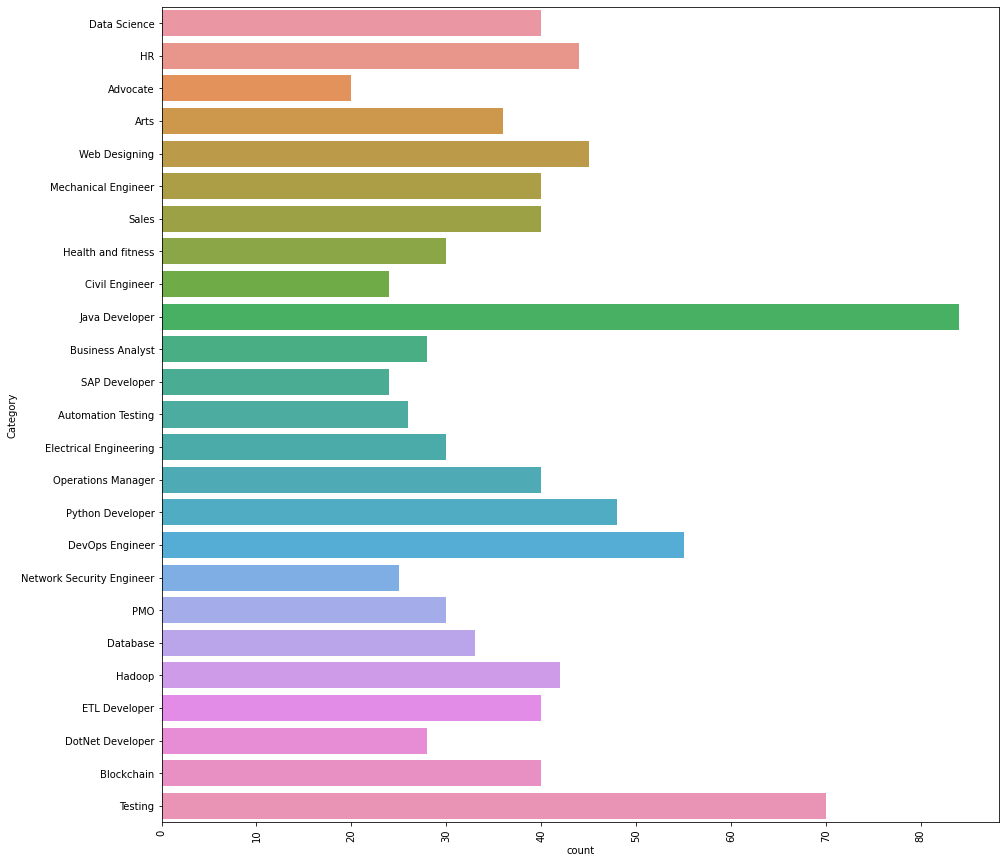

In [ ]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df)

In [ ]:
df["Resume"][2]

'Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \r\nJanuary 2019 B.Tech. Electrical and Electronics Engineering  Manipal Institute of Technology\r\nJanuary 2015    DEEKSHA CENTER\r\nJanuary 2013    Little Flower Public School\r\nAugust 2000    Manipal Academy of Higher\r\nDATA SCIENCE \r\n\r\nDATA SCIENCE AND ELECTRICAL ENTHUSIAST\r\nSkill Details \r\nData Analysis-

## Data cleaning

In [ ]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-\x7f]',' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
df['Cleaned_Resume'] = df.Resume.apply(lambda x: cleanResume(x))

In [ ]:
df.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
df.shape

(962, 3)

In [ ]:
#getting the entire resume text
corpus=" "
for i in range(0,962):
    corpus= corpus+ df["Cleaned_Resume"][i]

In [ ]:
len(corpus)

2805272

In [ ]:
corpus[1000:2500]

'review process and run analytics and generate reports Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain this tool implements predictive coding and topic modelling by automating reviews resulting in reduced labor costs and time spent during the lawyers review Understand the end to end flow of the solution doing research and development for classification models predictive analysis and mining of the information present in text data Worked on analyzing the outputs and precision monitoring for the entire tool TAR assists in predictive coding topic modelling from the evidence by following EY standards Developed the classifier models in order to identify red flags and fraud related issues Tools Technologies Python scikit learn tfidf word2vec doc2vec cosine similarity Na ve Bayes LDA NMF for topic modelling Vader and text blob for sentiment analysis Matplot lib Tableau dashboard for reporting MULTIPLE DATA SCIENCE AND ANAL

## Tokenization

A RegexpTokenizer splits a string into substrings using a regular expression. For example, the following tokenizer forms tokens out of alphabetic sequences, money expressions, and any other non-whitespace sequences:

In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+|\$[\d\.]+|\S+')
#Tokenizing the text
tokens = tokenizer.tokenize(corpus)
len(tokens)

412257

In [ ]:
# converting to lowercase
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

In [ ]:
# import re
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# corpus = []
# for i in range(0, 962):
#   review = re.sub('[^a-zA-Z]', ' ', df['Resume'][i])
#   review = review.lower()
#   review = review.split()
#   ps = PorterStemmer()
#   all_stopwords = stopwords.words('english')
#   all_stopwords.remove('not')
#   review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
#   review = ' '.join(review)
#   corpus.append(review)

In [ ]:
# print(corpus)

In [ ]:
# #The frequency distribution of the words
# freq_dist = nltk.FreqDist(corpus)
# #Frequency Distribution Plot
# plt.subplots(figsize=(20,12))
# freq_dist.plot(30)

In [ ]:
# mostcommon = freq_dist.most_common(50)

In [ ]:
# mostcommon

In [ ]:
# stopwords
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)

In [ ]:
len(words_new)

318631

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
wn = WordNetLemmatizer() 
lem_words=[]
for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 294
Number of words not Lemmatized= 1538


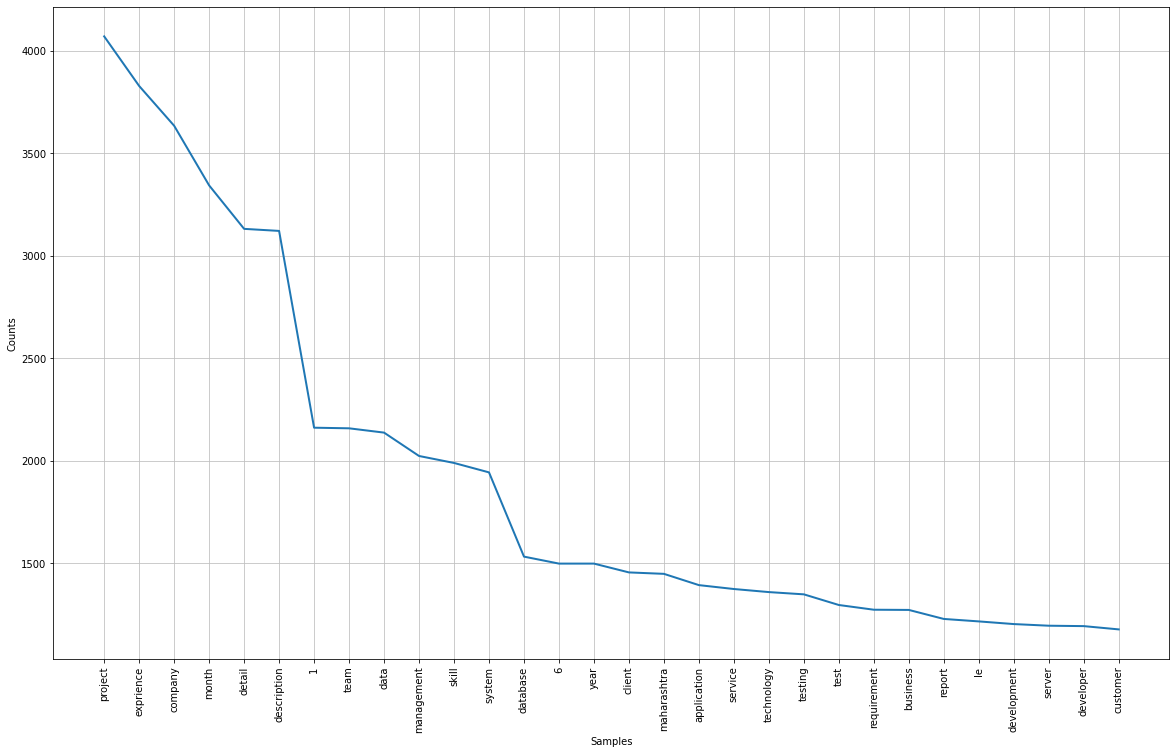

In [ ]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(lem_words)
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [ ]:
mostcommon = freq_dist.most_common(50)
mostcommon

[('project', 4071),
 ('exprience', 3829),
 ('company', 3635),
 ('month', 3344),
 ('detail', 3132),
 ('description', 3122),
 ('1', 2162),
 ('team', 2159),
 ('data', 2138),
 ('management', 2024),
 ('skill', 1990),
 ('system', 1944),
 ('database', 1533),
 ('6', 1499),
 ('year', 1499),
 ('client', 1456),
 ('maharashtra', 1449),
 ('application', 1394),
 ('service', 1375),
 ('technology', 1360),
 ('testing', 1349),
 ('test', 1297),
 ('requirement', 1274),
 ('business', 1273),
 ('report', 1229),
 ('le', 1217),
 ('development', 1204),
 ('server', 1196),
 ('developer', 1194),
 ('customer', 1178),
 ('ltd', 1177),
 ('process', 1163),
 ('responsibility', 1137),
 ('using', 1124),
 ('sql', 1120),
 ('january', 1090),
 ('java', 1076),
 ('engineering', 1055),
 ('work', 1038),
 ('pune', 1026),
 ('role', 969),
 ('c', 951),
 ('user', 916),
 ('operation', 895),
 ('software', 886),
 ('pvt', 879),
 ('sale', 845),
 ('activity', 832),
 ('environment', 800),
 ('design', 786)]

In [ ]:
#converting into string
res=' '.join([i for i in lem_words if not i.isdigit()])

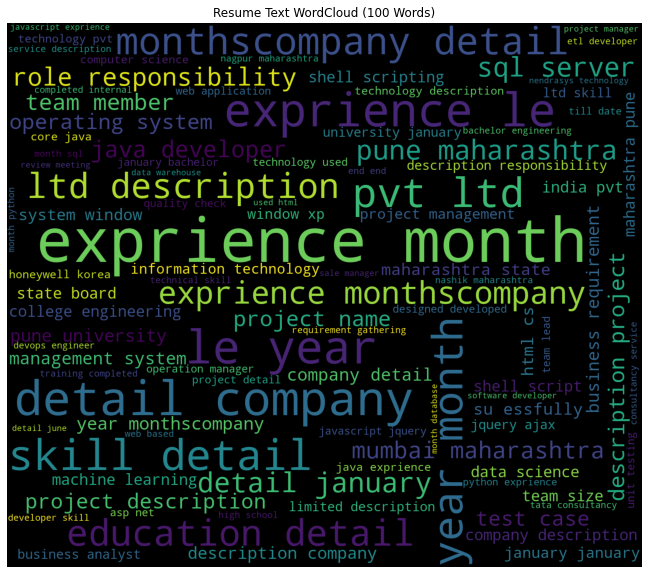

In [ ]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (100 Words)')
plt.axis('off')
plt.show()

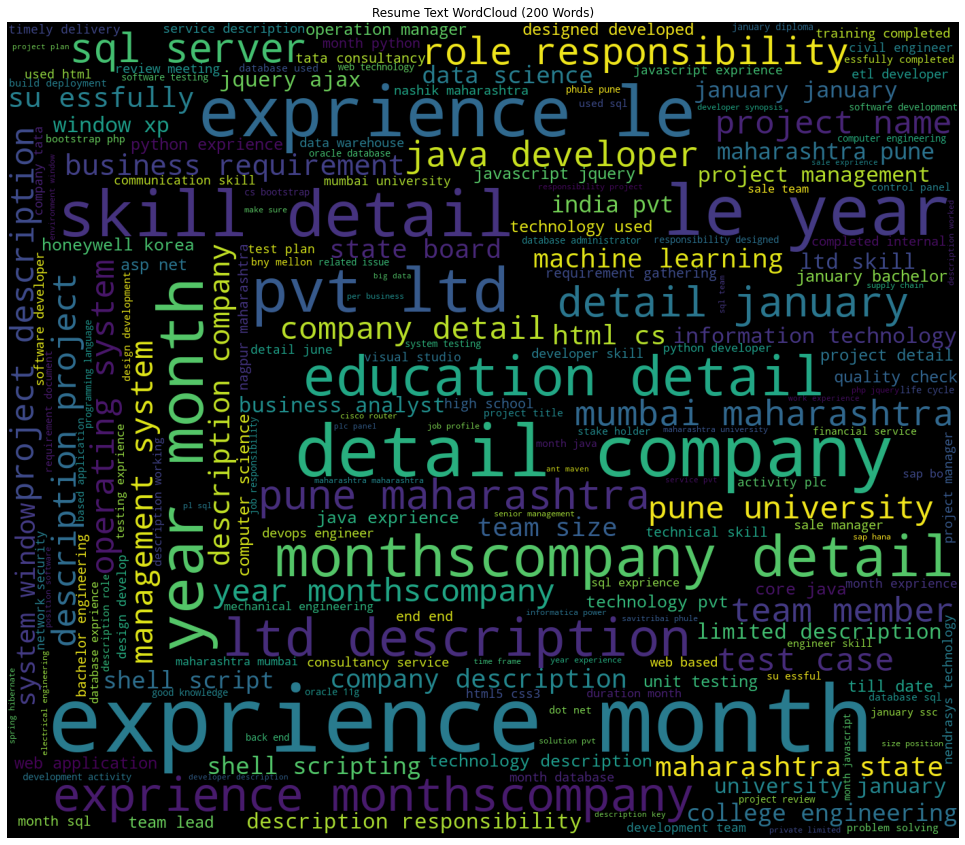

In [ ]:
plt.subplots(figsize=(20,15))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (200 Words)')
plt.axis('off')
plt.show()

In [ ]:
"Data Science"]
data_sciencedata_science= df[df["Category"]==.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
#getting the entire resume text
data_science_corpus=" "
for i in range(0,40):
    data_science_corpus= data_science_corpus+ data_science["Cleaned_Resume"][i]
data_science_corpus=data_science_corpus.lower()

In [ ]:
words_data_science=data_science_corpus.split()

In [ ]:
print('Frequency of "python"  is :', words_data_science.count("python"))
print('Frequency of "sap"  is :', words_data_science.count("sap"))
print('Frequency of "analysis"  is :', words_data_science.count("analysis"))
print('Frequency of "sql"  is :', words_data_science.count("sql"))
print('Frequency of "neural"  is :', words_data_science.count("neural"))
print('Frequency of "network"  is :', words_data_science.count("network"))
print('Frequency of "networks"  is :', words_data_science.count("networks"))
print('Frequency of "pandas"  is :', words_data_science.count("pandas"))
print('Frequency of "r"  is :', words_data_science.count("r"))
print('Frequency of "excel"  is :', words_data_science.count("excel"))
print('Frequency of "anaconda"  is :', words_data_science.count("anaconda"))
print('Frequency of "jupyter"  is :', words_data_science.count("jupyter"))
print('Frequency of "education"  is :', words_data_science.count("education"))
print('Frequency of "experience"  is :', words_data_science.count("experience"))

Frequency of "python"  is : 176
Frequency of "sap"  is : 68
Frequency of "analysis"  is : 84
Frequency of "sql"  is : 72
Frequency of "neural"  is : 48
Frequency of "network"  is : 12
Frequency of "networks"  is : 20
Frequency of "pandas"  is : 24
Frequency of "r"  is : 36
Frequency of "excel"  is : 12
Frequency of "anaconda"  is : 4
Frequency of "jupyter"  is : 4
Frequency of "education"  is : 48
Frequency of "experience"  is : 52


In [ ]:
print(df['Cleaned_Resume'].head())

0    Skills Programming Languages Python pandas num...
1    Education Details May 2013 to May 2017 B E UIT...
2    Areas of Interest Deep Learning Control System...
3    Skills R Python SAP HANA Tableau SAP HANA SQL ...
4    Education Details MCA YMCAUST Faridabad Haryan...
Name: Cleaned_Resume, dtype: object
